In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('Census Income.csv')
df.head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Univariate Analysis

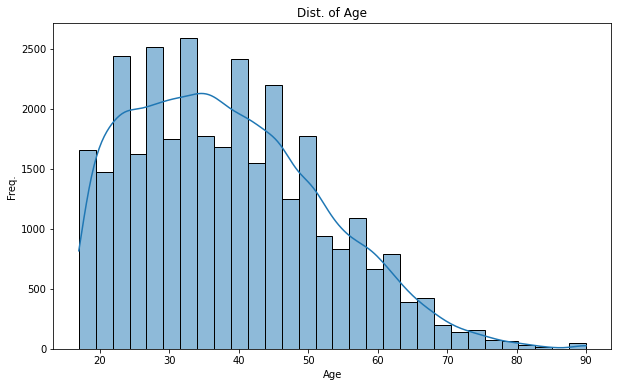

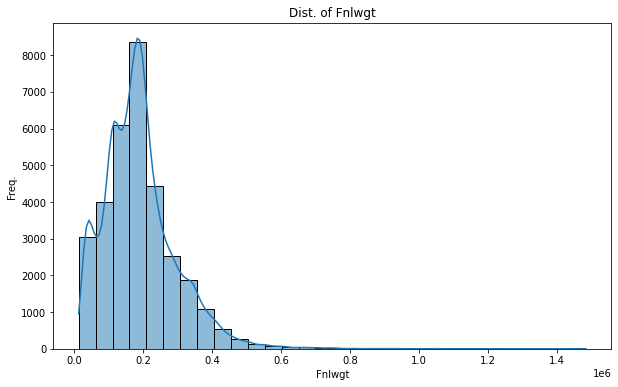

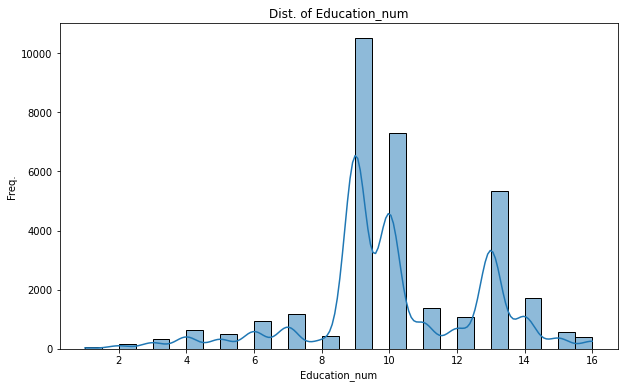

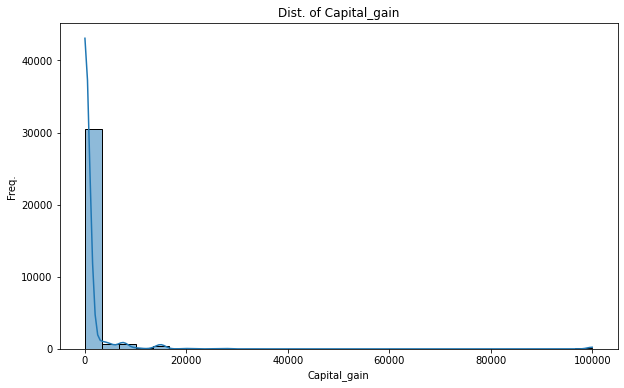

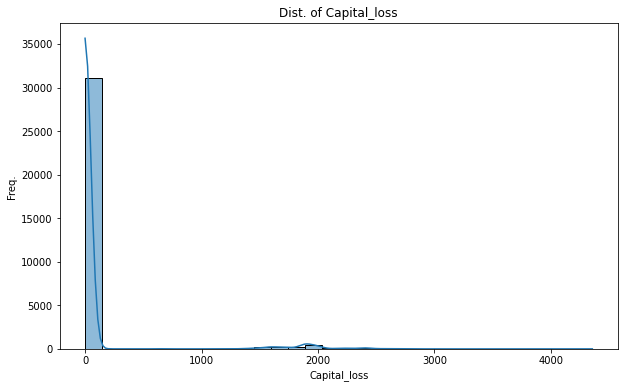

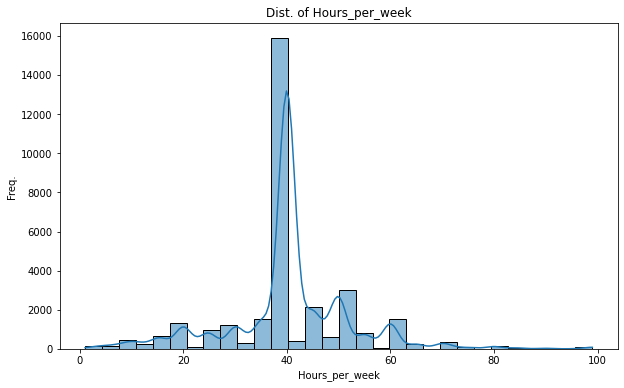

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_variables = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

for feature in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Dist. of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Freq.')
    plt.show()


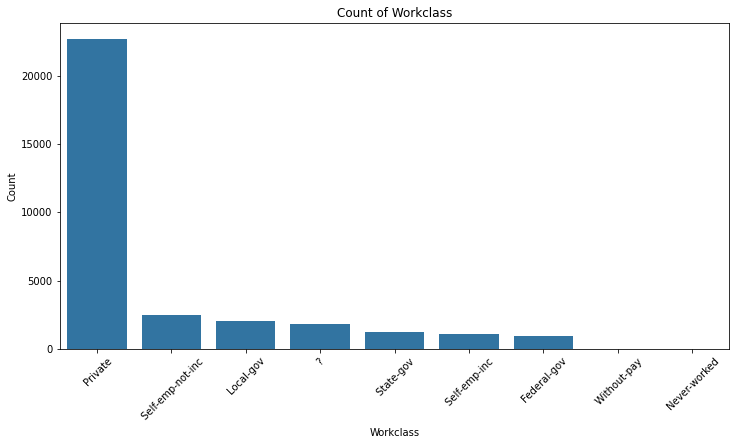

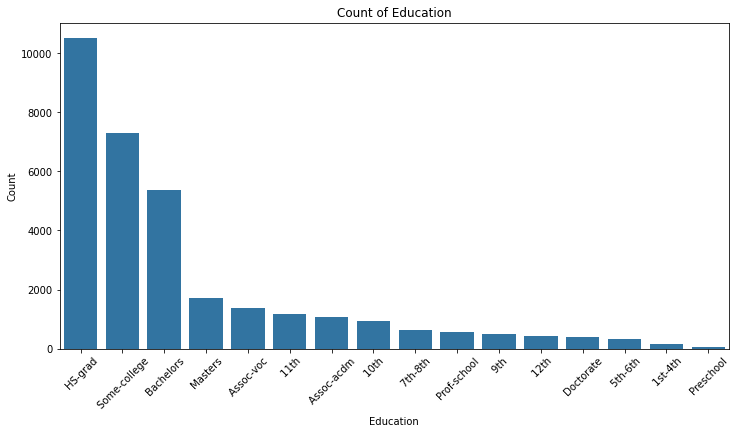

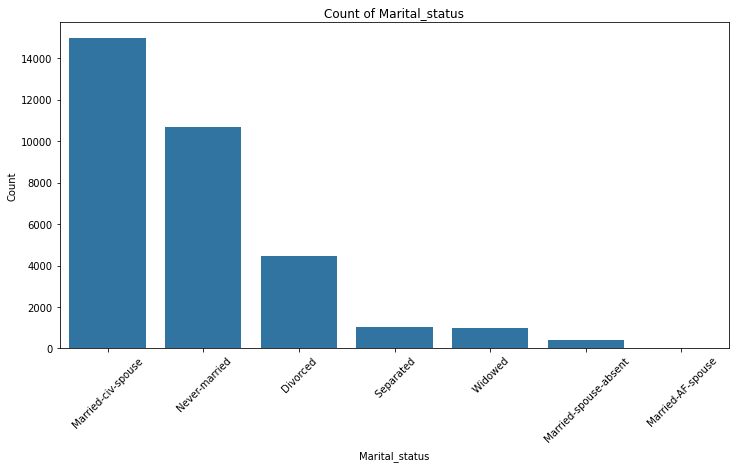

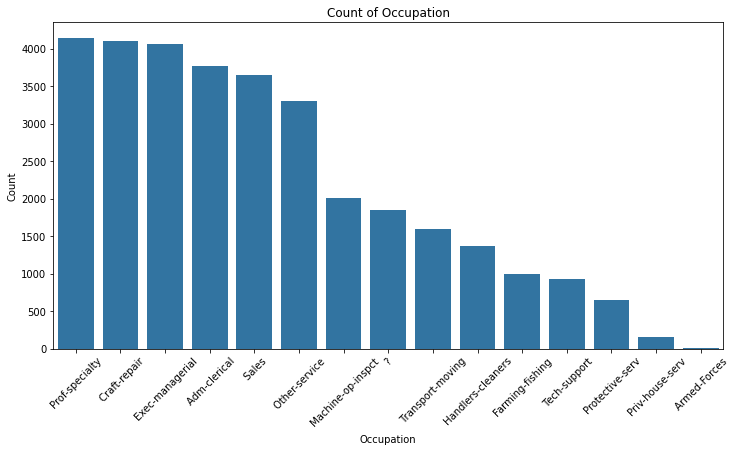

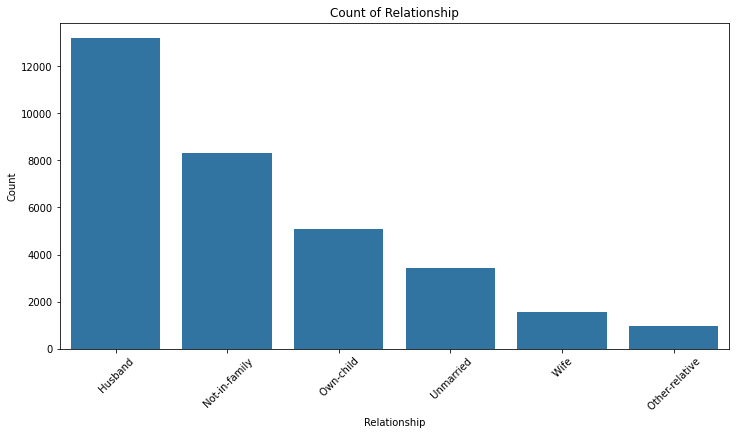

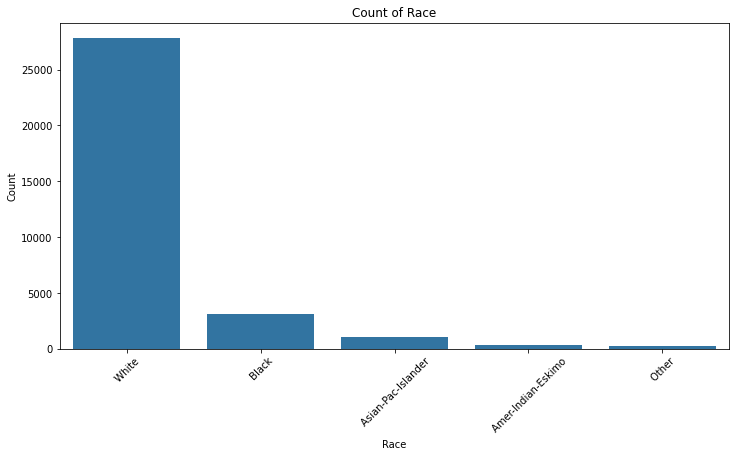

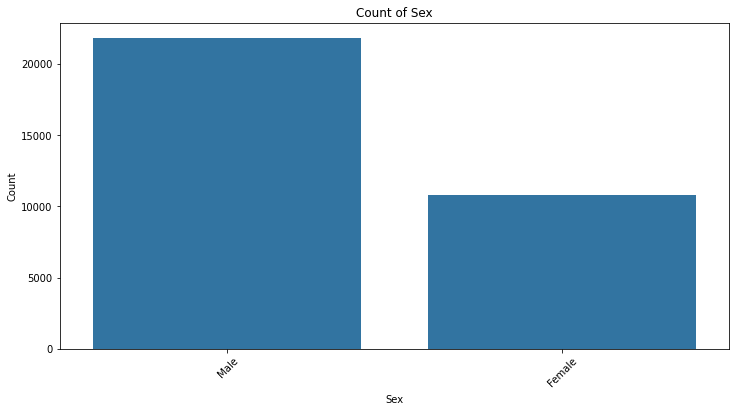

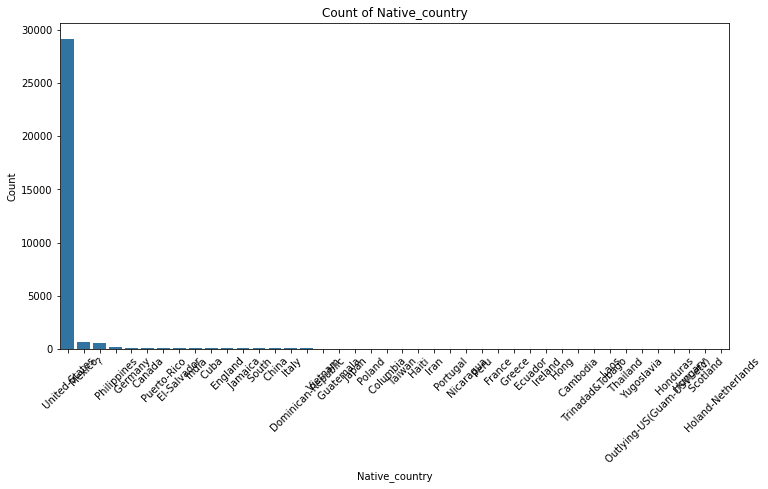

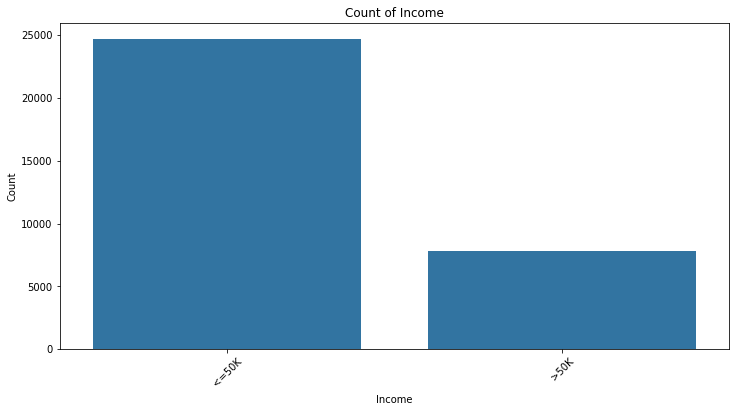

In [4]:
categorical_var = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

for feature in categorical_var:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Bivariate Analysis

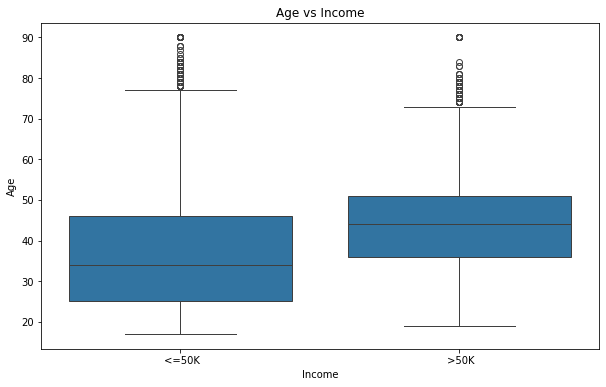

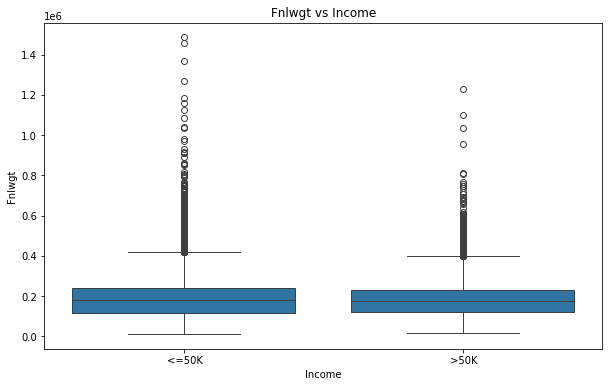

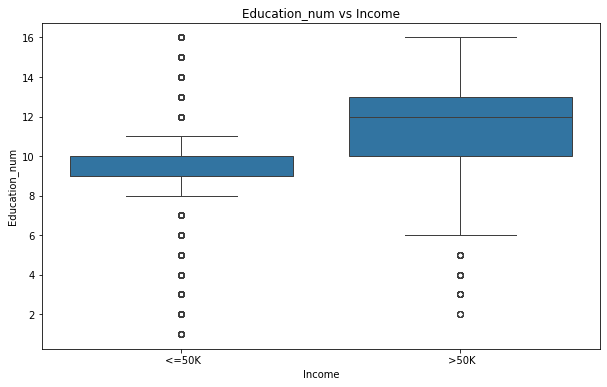

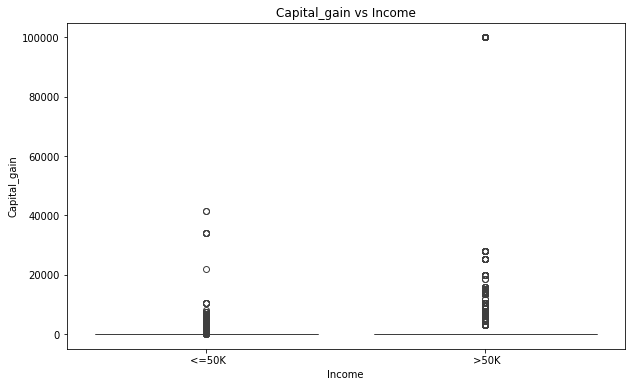

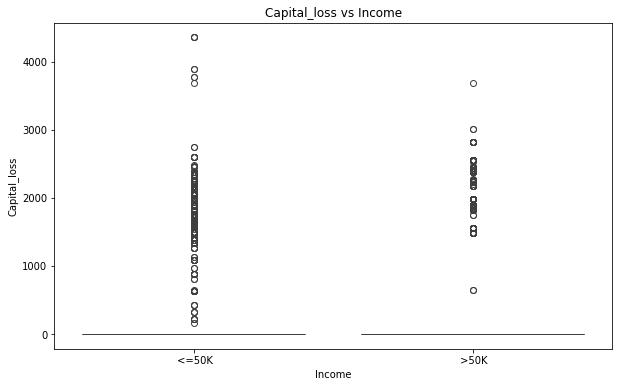

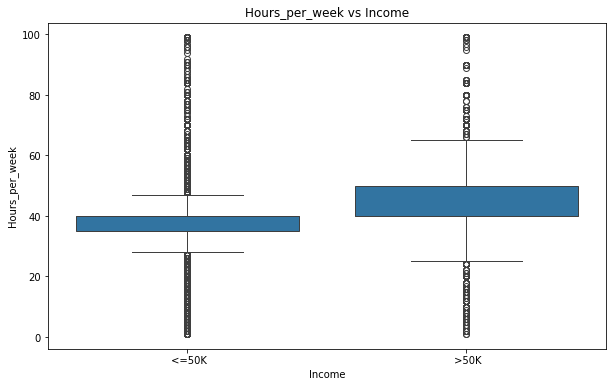

In [5]:
for feature in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Income', y=feature, data=df)
    plt.title(f'{feature} vs Income')
    plt.xlabel('Income')
    plt.ylabel(feature)
    plt.show()


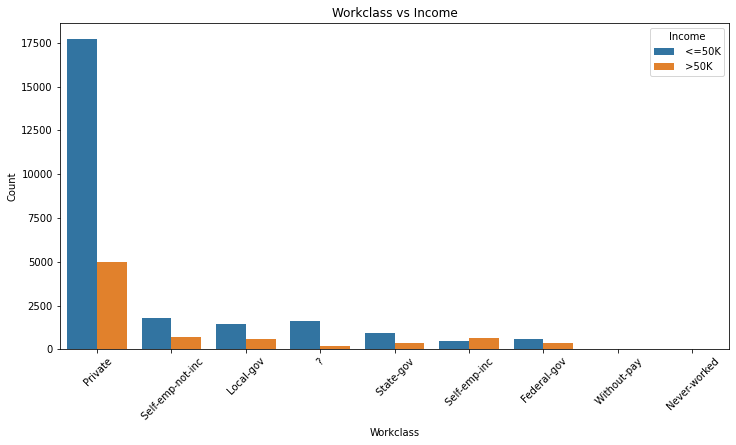

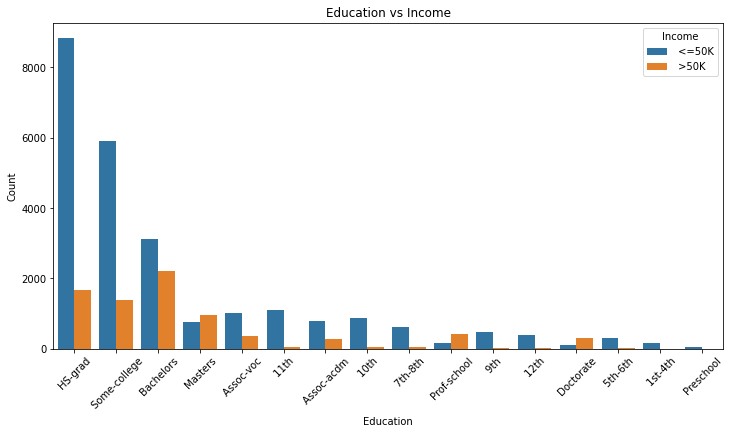

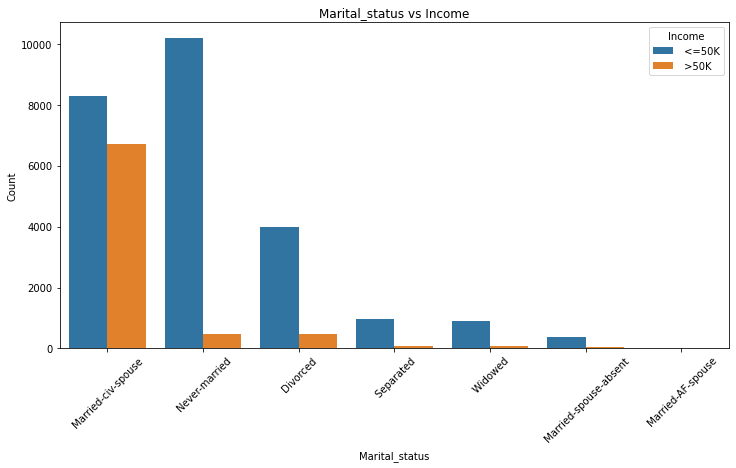

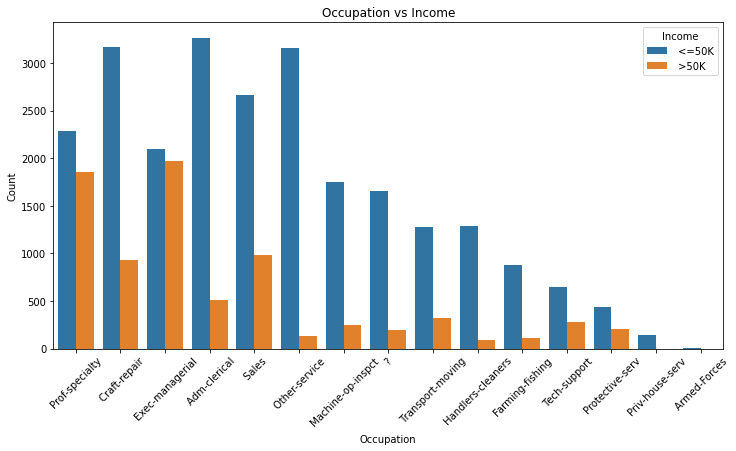

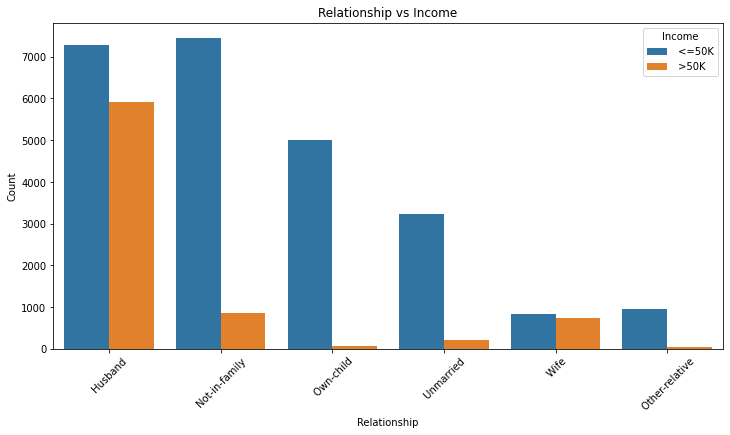

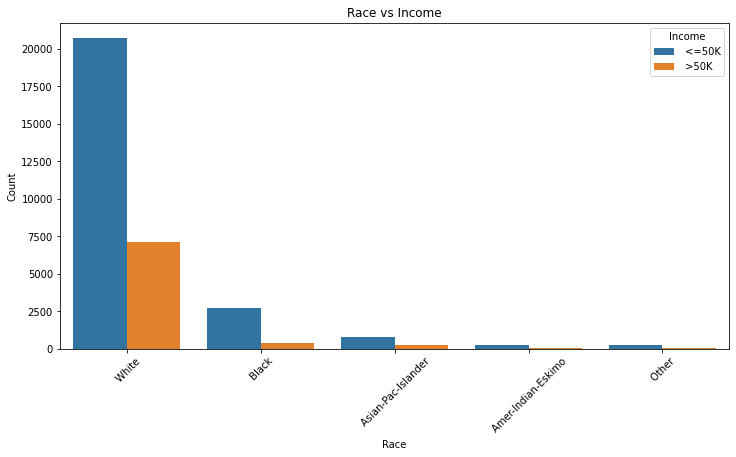

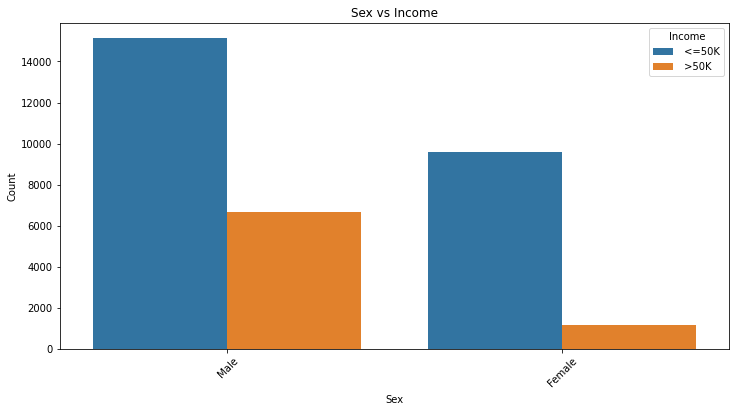

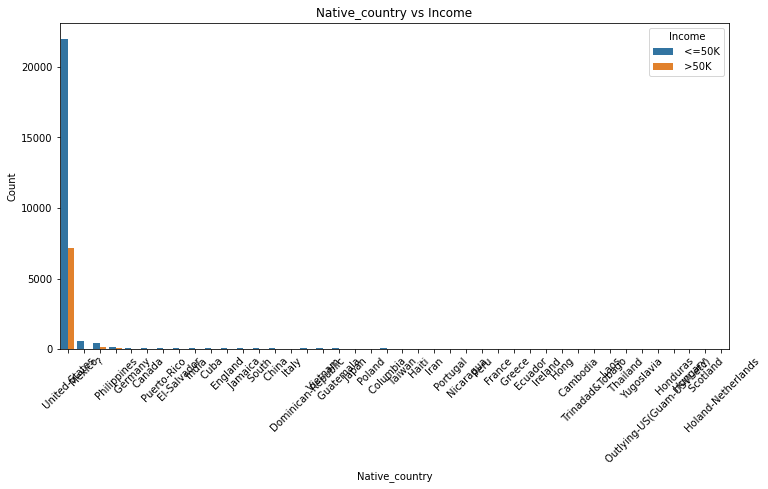

In [6]:
for feature in categorical_var:
    if feature != 'Income':
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=feature, hue='Income', order=df[feature].value_counts().index)
        plt.title(f'{feature} vs Income')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

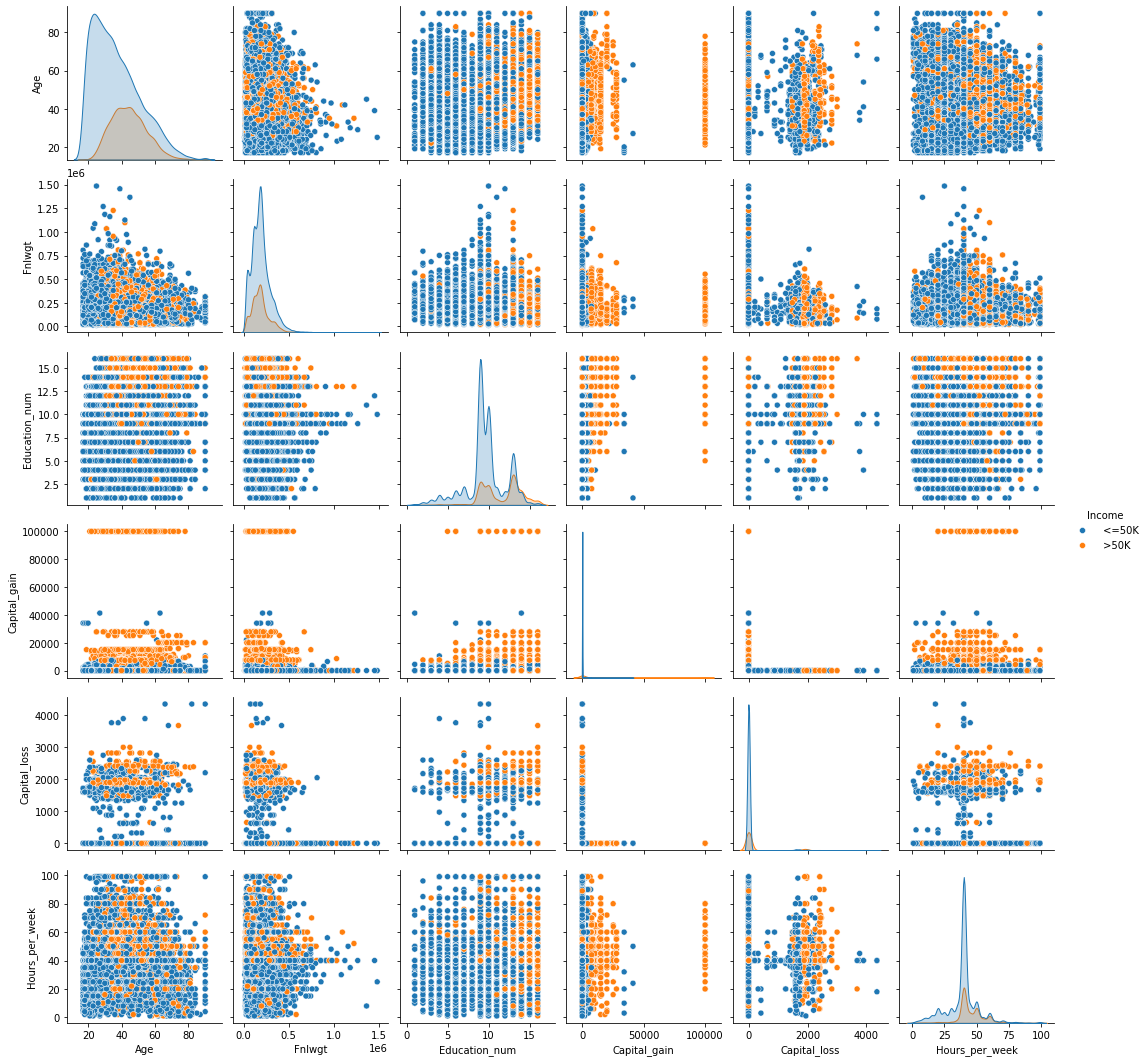

In [7]:
sns.pairplot(df, hue='Income', vars=numerical_variables)
plt.show()

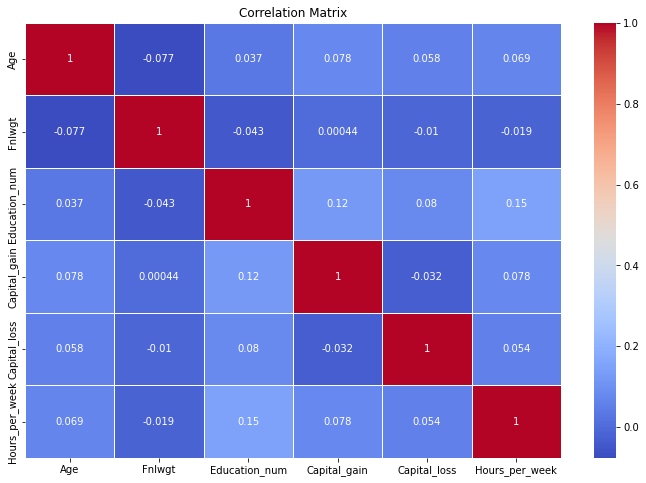

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
df.fillna(method='ffill', inplace=True)
label_encoders = {}
for feature in categorical_var:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
df['Age_hrs_per_week'] = df['Age'] * df['Hours_per_week']
df['Capital_gain_loss'] = df['Capital_gain'] - df['Capital_loss']
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
LR = LogisticRegression(random_state=42)

LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
print("LR - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nLR - Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nLR - Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))


LR - Confusion Matrix:
[[4599  313]
 [ 857  743]]

LR - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4912
           1       0.70      0.46      0.56      1600

    accuracy                           0.82      6512
   macro avg       0.77      0.70      0.72      6512
weighted avg       0.81      0.82      0.81      6512


LR - Accuracy Score:
0.8203316953316954


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
lr_cv_scores = cross_val_score(LR, X, y, cv=10)
print(f"LR Cross-Validation Scores: {lr_cv_scores}")
print(f"LR- Mean CV Score: {lr_cv_scores.mean()}")


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR Cross-Validation Scores: [0.81971744 0.82463145 0.8252457  0.82094595 0.82616708 0.83138821
 0.81787469 0.83261671 0.8289312  0.8227887 ]
LR- Mean CV Score: 0.8250307125307126


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DT - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nDT - Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDT - Accuracy Score:")
print(accuracy_score(y_test, y_pred_dt))


DT - Confusion Matrix:
[[4283  629]
 [ 606  994]]

DT - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4912
           1       0.61      0.62      0.62      1600

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.75      6512
weighted avg       0.81      0.81      0.81      6512


DT - Accuracy Score:
0.8103501228501229


In [17]:
dt_cv_scores = cross_val_score(dt, X, y, cv=10)
print(f"DT - Cross-Validation Scores: {dt_cv_scores}")
print(f"DT - Mean CV Score: {dt_cv_scores.mean()}")


DT - Cross-Validation Scores: [0.80743243 0.81633907 0.8215602  0.79699017 0.81787469 0.80988943
 0.80589681 0.81633907 0.81664619 0.81357494]
DT - Mean CV Score: 0.8122542997542996


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RF - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nRF - Classification Report:")
print(classification_report(y_test, y_pred))
print("\nRF - Accuracy Score:")
print(accuracy_score(y_test, y_pred))


RF - Confusion Matrix:
[[4568  344]
 [ 608  992]]

RF - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4912
           1       0.74      0.62      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512


RF - Accuracy Score:
0.8538083538083538


In [19]:
cv_scores = cross_val_score(rf, X, y, cv=10)
print(f"RF - Cross-Validation Scores: {cv_scores}")
print(f"RF - Mean CV Score: {cv_scores.mean()}")


RF - Cross-Validation Scores: [0.84735872 0.85749386 0.85503686 0.85749386 0.86240786 0.85472973
 0.85780098 0.86210074 0.86210074 0.85565111]
RF - Mean CV Score: 0.8572174447174448


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}
random_search_cv1 = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                      n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search_cv1.fit(X_train, y_train)

print(f"Best Parameters: {random_search_cv1.best_params_}")

# Evaluate the best model on the test set
best_rf = random_search_cv1.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
print("Best Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nBest Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nBest Random Forest - Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 200}
Best Random Forest - Confusion Matrix:
[[4622  290]
 [ 582 1018]]

Best Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4912
           1       0.78      0.64      0.70      1600

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512


Best Random Forest - Accuracy Score:
0.8660933660933661


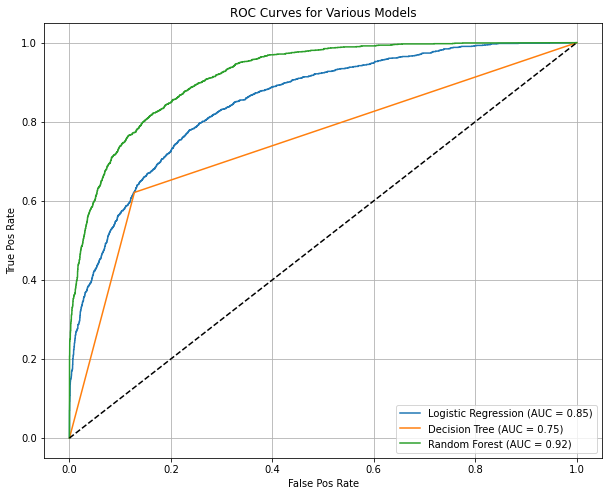

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_proba_lr = LR.predict_proba(X_test)[:, 1]
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
y_pred_proba_rf1 = best_rf.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_log_reg1 = roc_auc_score(y_test, y_pred_proba_lr)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_tree1 = roc_auc_score(y_test, y_pred_proba_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf1)
roc_auc_rf1 = roc_auc_score(y_test, y_pred_proba_rf1)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg1:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree1:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf1:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curves for Various Models')
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Logistic Regression (AUC = 0.85) indicate Blue curve and its good at distinguishing between classes.

Decision Tree (AUC = 0.75) indicate orange curve which is moderate ability to distinguish classes and less effective compared to Logistic Regression and Random Forest.
Random Forest (AUC = 0.92) which green curve and its an excellent at distinguishing between classes with very high TPR and very low FPR.
In short, Random Forest is the best model with the highest AUC (0.92), indicating the best performance.
Logistic Regression performs well with an AUC of 0.85 and also Decision Tree is the least effective with an AUC of 0.75.

The Best Model:
The Random Forest model has been determined to be the most effective model by analyzing its performance metrics in relation to several assessment criteria. This is a thorough justification for the model selection:


High Accuracy: With an accuracy of 85.38%, the Random Forest model was able to properly classify 85.38% of the test set's instances. This is a reliable measure of the model's overall effectiveness.

Well-Balanced Precision and Recall: The model showed that recall and precision were well-balanced. Its precision is 0.88 and recall is 0.93 for class 0 (<=50K). Its precision is 0.74 and recall is 0.62 for class 1 (>50K), which means that the model can accurately identify both groups 

For class 0 and class 1, the F1-score—the harmonic mean of precision and recall—is 0.91 and 0.68, respectively. This suggests that for both classes, the model successfully strikes a compromise between recall and precision.

With a mean cross-validation score of 0.8572, the model's performance remained stable across a 10-fold cross-validation. This consistency across several data subsets indicates the model's robustness and its ability to generalize well to new data.

True Negatives: The model correctly identified 4568 instances where the income is less than or equal to 50K.
True Positives: The model correctly identified 992 instances where the income is greater than 50K.
False Positives: The model incorrectly predicted 344 instances as having an income greater than 50K when they actually have an income less than or equal to 50K. This is known as a Type I error.
False Negatives: The model incorrectly predicted 608 instances as having an income less than or equal to 50K when they actually have an income greater than 50K. This is known as a Type II error.


The Random Forest model has demonstrated strong and balanced performance across all evaluated metrics, making it the best choice for predicting whether a person makes over $50K a year based on the given dataset. Its ability to maintain high accuracy, precision, recall, and consistency through cross-validation supports its selection as the final model.